In [ ]:
import tensorflow as tf
 
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving VGG6_model_1.h5 to VGG6_model_1.h5
User uploaded file "VGG6_model_1.h5" with length 14304960 bytes


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


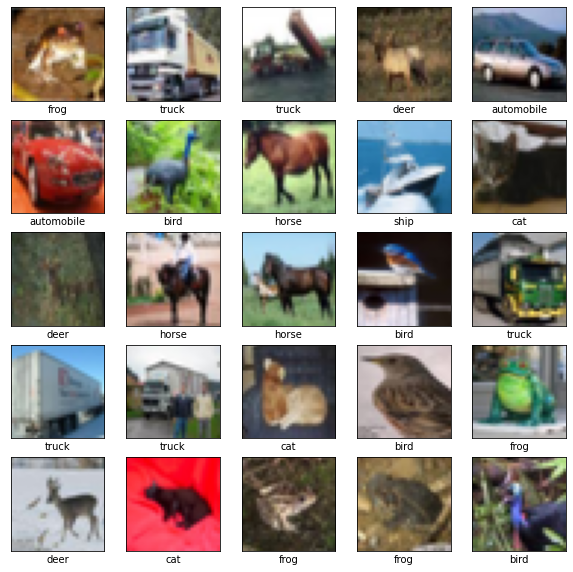

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_img, val_img, train_lab, val_lab = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.2)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax')) # activation = 'softmax', when from_logits = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
def model_vgg6():  
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [ ]:
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_img, train_lab, epochs=50, batch_size = 32,
                    validation_data=(val_img, val_lab)) # validation_split=0.2

Epoch 1/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7317 - accuracy: 0.3581 - val_loss: 1.4500 - val_accuracy: 0.4808
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3957 - accuracy: 0.5024 - val_loss: 1.2002 - val_accuracy: 0.5618
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2477 - accuracy: 0.5586 - val_loss: 1.1456 - val_accuracy: 0.5877
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1484 - accuracy: 0.5929 - val_loss: 1.0767 - val_accuracy: 0.6215
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0743 - accuracy: 0.6219 - val_loss: 1.0511 - val_accuracy: 0.6289
Epoch 6/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0180 - accuracy: 0.6419 - val_loss: 0.9865 - val_accuracy: 0.6542
Epoch 7/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9715 - accuracy: 0.6600 - val_loss: 1.0333 - val_accuracy:

In [ ]:
model = model_vgg6()

In [ ]:
model.load_weights('CNN_model_1.h5')

In [ ]:
model.load_weights('VGG6_model_1.h5')

In [ ]:
{i.name:i.get_config() for i in model.layers}

{'conv2d_3': {'activation': 'relu',
  'activity_regularizer': None,
  'batch_input_shape': (None, 32, 32, 3),
  'bias_constraint': None,
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'bias_regularizer': None,
  'data_format': 'channels_last',
  'dilation_rate': (1, 1),
  'dtype': 'float32',
  'filters': 32,
  'groups': 1,
  'kernel_constraint': None,
  'kernel_initializer': {'class_name': 'GlorotUniform',
   'config': {'seed': None}},
  'kernel_regularizer': None,
  'kernel_size': (3, 3),
  'name': 'conv2d_3',
  'padding': 'valid',
  'strides': (1, 1),
  'trainable': True,
  'use_bias': True},
 'conv2d_4': {'activation': 'relu',
  'activity_regularizer': None,
  'bias_constraint': None,
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'bias_regularizer': None,
  'data_format': 'channels_last',
  'dilation_rate': (1, 1),
  'dtype': 'float32',
  'filters': 64,
  'groups': 1,
  'kernel_constraint': None,
  'kernel_initializer': {'class_name': 'GlorotUniform'

In [ ]:
model.layers

https://toments.com/2489664/  
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

##**Filter visualization**

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_3 (3, 3, 3, 32)
conv2d_4 (3, 3, 32, 64)
conv2d_5 (3, 3, 64, 64)


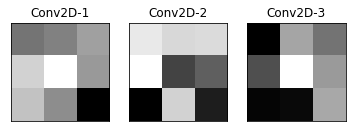

In [ ]:
layer_ids = [0,2,4]

#plot the filters
num = len(layer_ids)

fig,ax = plt.subplots(nrows=1, ncols=num)

for i in range(num):

  ax[i].imshow(model.layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
  
  ax[i].set_title('Conv2D-'+str(i+1))

  ax[i].set_xticks([])

  ax[i].set_yticks([])

##**Feature map**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_3 (None, 30, 30, 32)
2 conv2d_4 (None, 13, 13, 64)
4 conv2d_5 (None, 4, 4, 64)


In [ ]:
from tensorflow.keras.models import Model

30 X 30 X 32 => 30 X 30 (image shape) and 32 (number of feature map)

In [ ]:
model = model_vgg6()

In [ ]:
model_1 = Model(inputs=model.inputs, outputs=model.layers[0].output)
model_1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show>

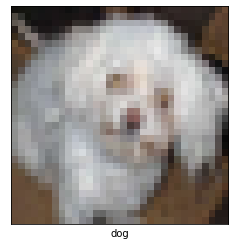

In [ ]:
i = 1000
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[i])
plt.xlabel(class_names[test_labels[i][0]])
plt.show

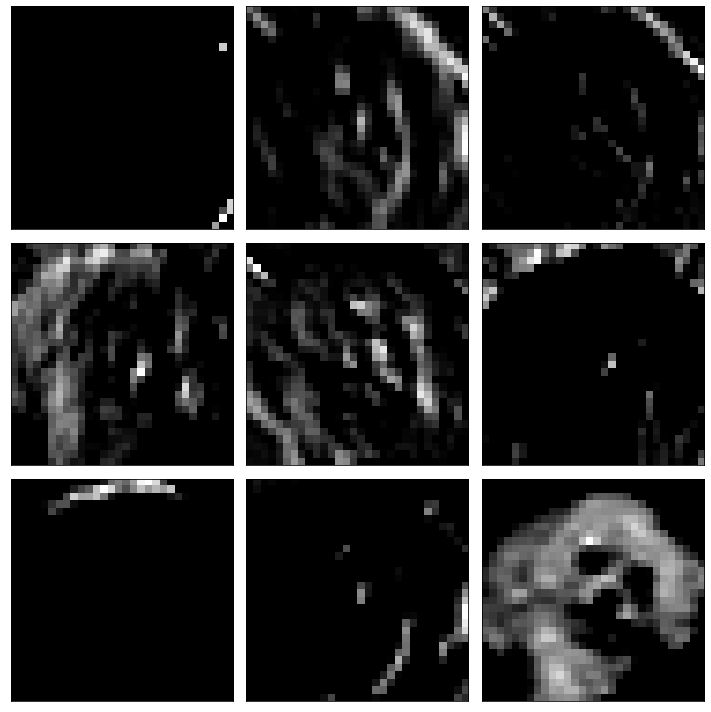

In [ ]:
# get feature map for first hidden layer
img = test_images[i]
img = np.expand_dims(img, axis=0)
feature_maps = model_1.predict(img)

ix = 1
plt.figure(figsize=(10,10))
for _ in range(3):
	for _ in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(3, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.tight_layout()
plt.show()

In [ ]:
feature_maps.shape

(1, 30, 30, 32)

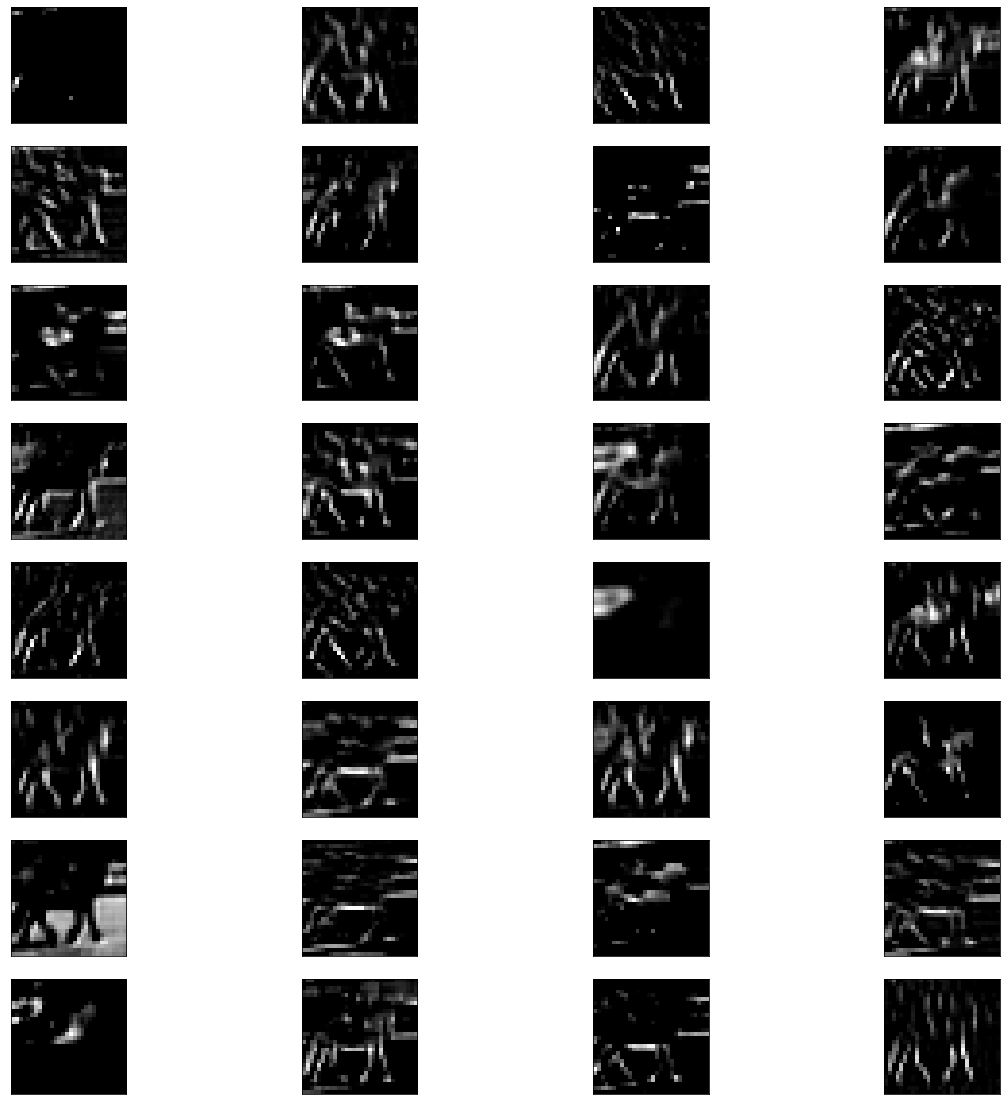

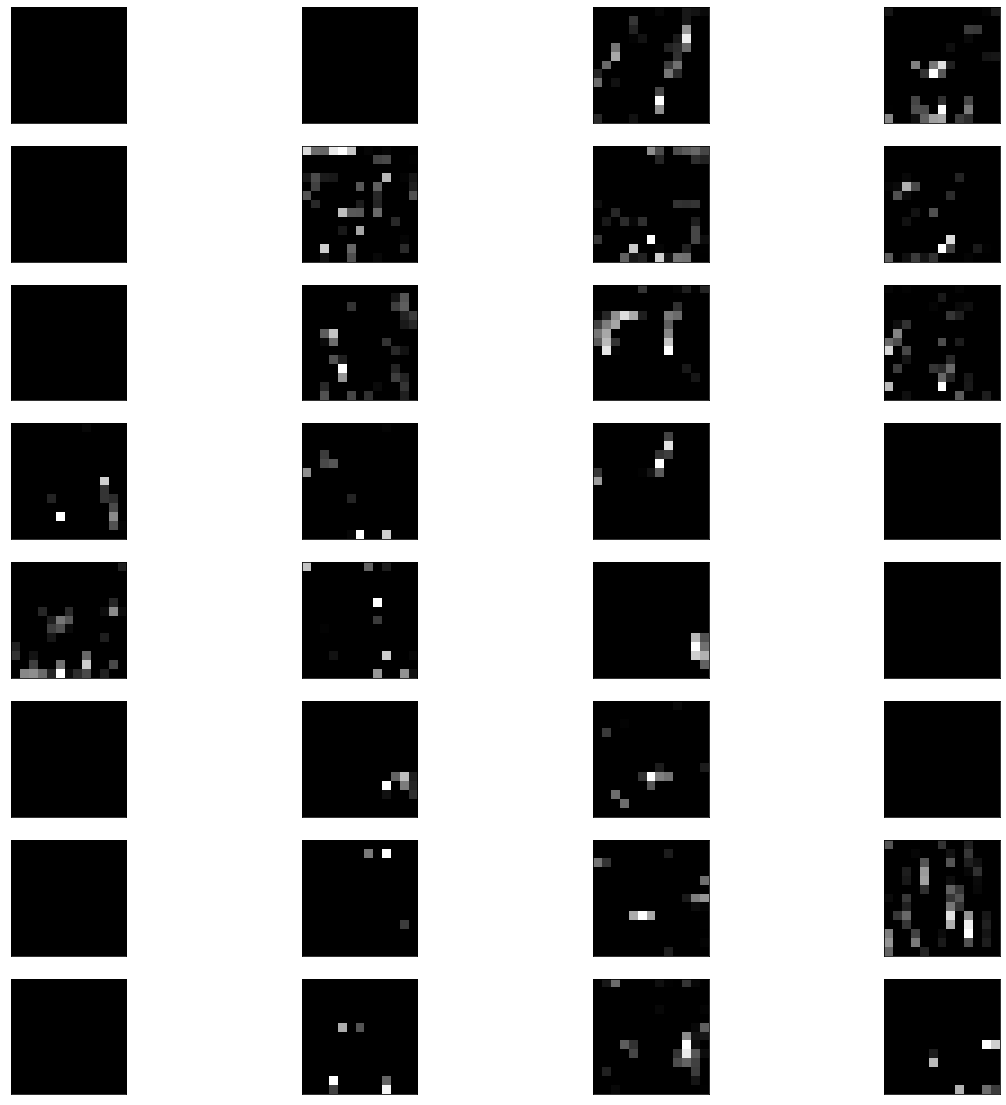

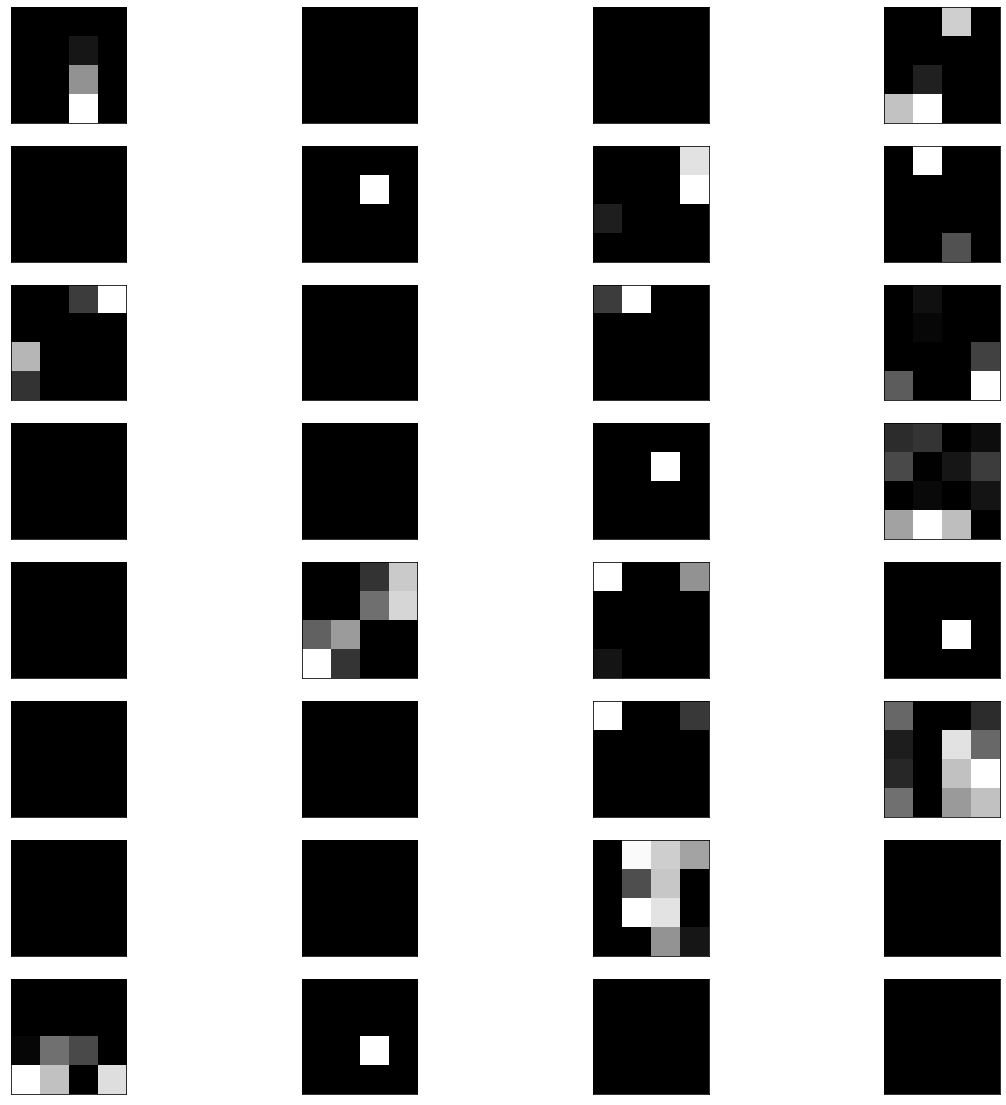

In [ ]:
ixs = [0, 2, 4]
outputs = [model.layers[i].output for i in ixs]

model_2 = Model(inputs=model.inputs, outputs=outputs)

feature_maps = model_2.predict(img)

for fmap in feature_maps:
  ix = 1
  plt.figure(figsize=(20,20))
  for _ in range(8):
    for _ in range(4):
			# specify subplot and turn of axis
      ax = plt.subplot(8, 4, ix)
      ax.set_xticks([])
      ax.set_yticks([])
			# plot filter channel in grayscale
      plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
  plt.show()


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_______________________________________________________

##**Grad-CAM**

In [ ]:
import matplotlib.cm as cm

In [ ]:
def get_last_conv(model):
  rev_model_layers = list(reversed(model.layers))
  for layer in rev_model_layers:
    if 'conv2d' in layer.name:
      return layer.name
  raise ValueError('No Conv_layer')

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def display_gradcam(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    #superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.imshow(superimposed_img)
    plt.colorbar()
    plt.show()

In [ ]:
model_3 = model_vgg6()

In [ ]:
model_3.load_weights('VGG6_model_1.h5')

In [ ]:
model_3.layers[-1].activation = None

In [ ]:
i = 1000
img = test_images[i]
img = np.expand_dims(img, axis=0)

In [ ]:
preds = model.predict(img)

In [ ]:
class_names[np.argmax(preds)]

'dog'

In [ ]:
last_conv_layer_name = get_last_conv(model_3)

In [ ]:
heatmap = make_gradcam_heatmap(img, model_3, last_conv_layer_name)

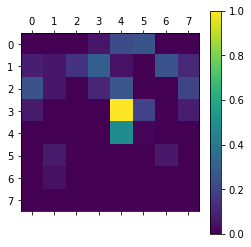

In [ ]:
plt.matshow(heatmap)
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show>

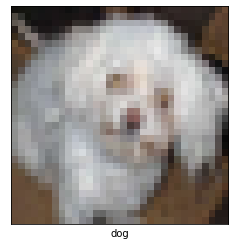

In [ ]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[i])
plt.xlabel(class_names[test_labels[i][0]])
plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


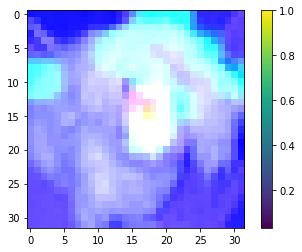

In [ ]:
display_gradcam(test_images[i], heatmap, alpha=0.01)

In [ ]:
label_idx=[]

In [ ]:
for i in range(10):
  for j in range(len(test_images)):
    if test_labels[j]==i:
      label_idx.append(j)
      break

In [ ]:
label_idx

[3, 6, 25, 0, 22, 12, 4, 13, 1, 11]

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

NameError: ignored

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 5])
plt.legend(loc='lower right')

In [ ]:
val_loss, val_acc = model.evaluate(val_img,  val_lab, verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
for i in range(len(predict)):
  test_pre[i] = np.argmax(predict[i])

In [ ]:
test_pre[0:5]

In [ ]:
for i in test_pre[0:5]:
  print(i[0])

In [ ]:
test_lab4list = [i[0] for i in test_labels]

In [ ]:
test_predict = [i[0] for i in test_pre]

In [ ]:
test_lab4list[0:5]

In [ ]:
test_predict[0:5]

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    https://honglung.pixnet.net/blog/post/214669413-%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%99%A3
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
confusion_matrix(test_labels, test_pre)

In [ ]:
plt.figure(figsize=(7,7))
cnf_matrix = confusion_matrix(test_labels, test_pre)
plot_confusion_matrix(cnf_matrix, classes=class_names ,normalize=False, title = 'confusion matrix')

##**取特徵資料**

In [ ]:
model.layers

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model_1 = Model(inputs=model.inputs, outputs=model.layers[9].output)
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0     

In [ ]:
predicted_data = model.predict(test_images)

In [ ]:
predicted_data[0]

array([2.0311219e-08, 2.4651594e-12, 3.9326283e-14, 9.6384180e-01,
       9.8802791e-13, 1.7406866e-03, 3.5728440e-06, 1.1736522e-16,
       3.4413990e-02, 4.7540442e-14], dtype=float32)

In [ ]:
label = []
row = []
length = len(test_images)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
for i in range(10):
  for j in range(length):
    if np.argmax(predicted_data[j]) == i:
      label.append(j)
      row.append(class_names[i])
      break

In [ ]:
for i in range(10):
  for j in range(length):
    t = test_labels[j][0]
    p = np.argmax(predicted_data[j])
    if t == i and p != t:
      label.append(j)
      s = f'{class_names[t]}->{class_names[p]}'
      row.append(s)
      print(s)
      break

airplane->ship
automobile->truck
bird->ship
cat->dog
deer->airplane
dog->deer
frog->deer
horse->dog
ship->airplane
truck->ship


In [ ]:
label

[2, 6, 25, 0, 7, 12, 4, 13, 1, 11, 10, 37, 35, 61, 22, 24, 7, 57, 2, 47]

In [ ]:
row

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck',
 'airplane->ship',
 'automobile->truck',
 'bird->ship',
 'cat->dog',
 'deer->airplane',
 'dog->deer',
 'frog->deer',
 'horse->dog',
 'ship->airplane',
 'truck->ship']

In [ ]:
img = test_images[2]
img = np.expand_dims(img, axis=0)
feature_maps = model_1.predict(img)
feature_maps.shape


(1, 4096)

In [ ]:
img = test_images[label]

In [ ]:
feature_maps = model_1.predict(img)

In [ ]:
feature_maps.shape

(20, 4096)

In [5]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir('/content/drive/My Drive/')

In [ ]:
data = pd.DataFrame(feature_maps)

In [ ]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.244,2.725331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.898809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.434154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976485,0.0,0.0,0.0,0.494053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.603507,0.0,0.0,0.0,0.0,0.0,0.084898,0.0,1.435979,0.080631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.index = row

In [10]:
data.to_csv("data.csv")

In [ ]:
from google.colab import files

In [ ]:
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
data = pd.read_csv('data.csv')

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
airplane,1.244,2.725331,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.898809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.434154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.976485,0.000000,0.0,0.0,0.494053,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.603507,0.0,0.0,0.0,0.0,0.0,0.084898,0.000000,1.435979,0.080631,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
automobile,0.000,0.000000,0.0,0.0,1.431907,6.529223,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.019102,0.0,0.0,0.000000,0.913439,0.0,0.0,0.000000,...,1.610334,0.0,0.0,0.0,0.0,0.000000,2.806177,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
bird,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.464962,0.0,0.040633,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.867188,2.857000,0.0,0.0,0.000000,2.218696,0.0,0.0,0.000000,...,1.954892,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.169267,0.0,0.0,0.000000,0.0,0.0,0.0,1.733722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627243,0.0,0.0
cat,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125774,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.704295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.054995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.573944,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
deer,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.112278,0.000000,1.207733,0.0,0.0,0.0,0.0,1.072235,0.0,0.0,0.000000,0.0,0.0,0.0,0.471628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [8]:
data.index = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck',
 'airplane->ship',
 'automobile->truck',
 'bird->ship',
 'cat->dog',
 'deer->airplane',
 'dog->deer',
 'frog->deer',
 'horse->dog',
 'ship->airplane',
 'truck->ship']

In [ ]:
data